<img src='../images/cbslogo.jpg' width="30%" align="left" />

# Kombination der Fahrten und Stationen
## - Phase: Data Understanding -

Das Ziel dieses Notebooks ist die Zusammenführung der Fahrten mit den Geodaten der Stationen.

Dieses Notebook nutzt die folgenden Dateien:
    trips_raw.pkl,
    trips_clean.pkl.
    
Folgende Dateien werden durch dieses Notebook erzeugt: 
   tripdata_coordinates.pkl.  

In [5]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import geopy.distance
from datetime import date
from workalendar.core import Calendar

In [6]:
RAWDATA_PATH = '../data/raw'
DATA_PATH = '../data/'
TRIPS_FILE = 'trips_raw.pkl'
STATION_LOCATION = RAWDATA_PATH+'/Station_Data.csv'
COMBINED_DATA = DATA_PATH + '/tripdata_coordinates.pkl'

In [7]:
df_station_data = pd.read_csv(STATION_LOCATION)

In [8]:
df_station_data.to_pickle(DATA_PATH+'station_location.pkl')

In [9]:
df_trips=pd.read_pickle(DATA_PATH+'trips_clean.pkl')

In [10]:
df_station_data = df_station_data[['TERMINAL_NUMBER', 'LATITUDE', 'LONGITUDE']]

In [11]:
df_station_data.head()

,TERMINAL_NUMBER,LATITUDE,LONGITUDE
0,31612,38.894758,-76.997114
1,31226,38.916442,-77.068200
2,31227,38.900283,-77.029822
3,31228,38.899700,-77.023086
4,31504,38.932514,-76.992889


In [12]:
BBox = ((df_station_data.LONGITUDE.min(),   df_station_data.LONGITUDE.max(),      
         df_station_data.LATITUDE.min(), df_station_data.LATITUDE.max()))

In [13]:
map_w= plt.imread('../images/map.png')

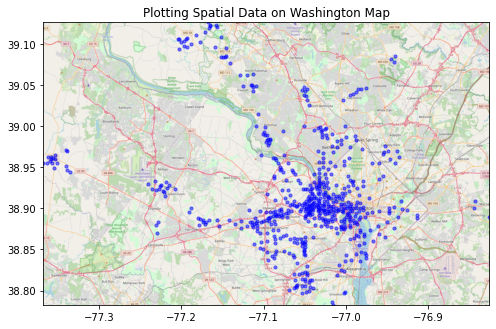

In [14]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df_station_data.LONGITUDE, df_station_data.LATITUDE, zorder=1, alpha= 0.5,c='b', s=10)
ax.set_title('Plotting Spatial Data on Washington Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(map_w, zorder=0, extent = BBox, aspect= 'equal')

In [ ]:
df_complete =pd.merge(df_trips, df_station_data, right_on='TERMINAL_NUMBER', left_on='start_station_id').drop('TERMINAL_NUMBER', axis=1).rename(columns={'LATITUDE':'Latitude_start_station', 'LONGITUDE':'Longitude_start_station'})

In [ ]:
df_complete

In [15]:
df_complete =pd.merge(df_complete, df_station_data, right_on='TERMINAL_NUMBER', left_on='end_station_id').drop('TERMINAL_NUMBER', axis=1).rename(columns={'LATITUDE':'Latitude_end_station', 'LONGITUDE':'Longitude_end_station'})

In [16]:
df_complete.isnull().sum()

start_ts                   0
end_ts                     0
start_station_id           0
end_station_id             0
bike_number                0
Member type                0
start_date                 0
start_hour                 0
end_date                   0
end_hour                   0
Latitude_start_station     0
Longitude_start_station    0
Latitude_end_station       0
Longitude_end_station      0
dtype: int64

In [17]:
df_complete['start_day_of_week'] = df_complete['start_date'].dt.day_name()

In [18]:
df_complete['end_day_of_week'] = df_complete['end_date'].dt.day_name()

In [19]:
df_complete.to_pickle(DATA_PATH + 'tripdata_coordinates.pkl')